2025-10-24 01:39:28.640786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.10.0
Found 23708 images. Loading and preprocessing...


100%|██████████| 23708/23708 [00:54<00:00, 433.75it/s]



Successfully loaded 23708 images and 23708 labels.
Image array shape: (23708, 128, 128, 3)
Ages array shape: (23708,)

Training set: 18966 samples
Validation set: 2371 samples
Test set: 2371 samples


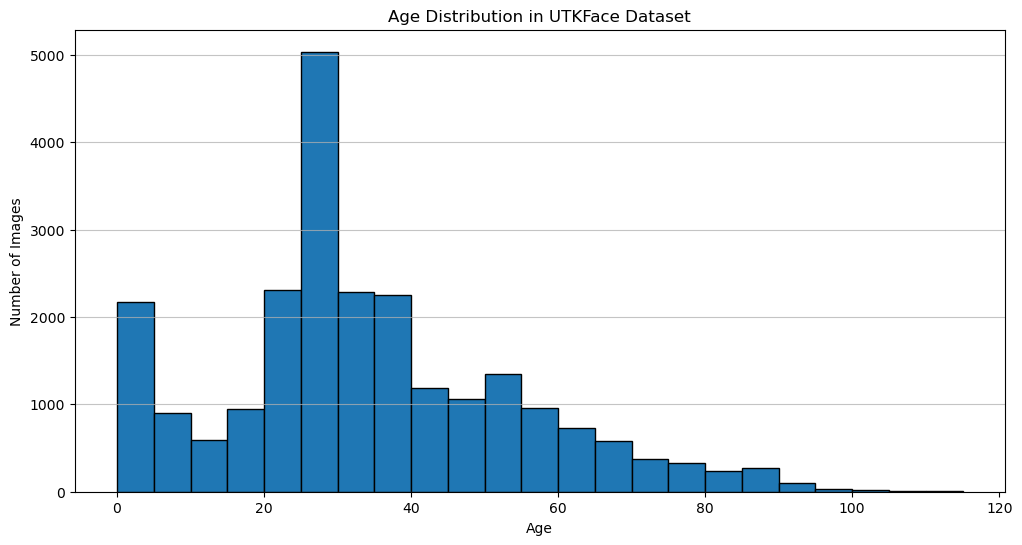

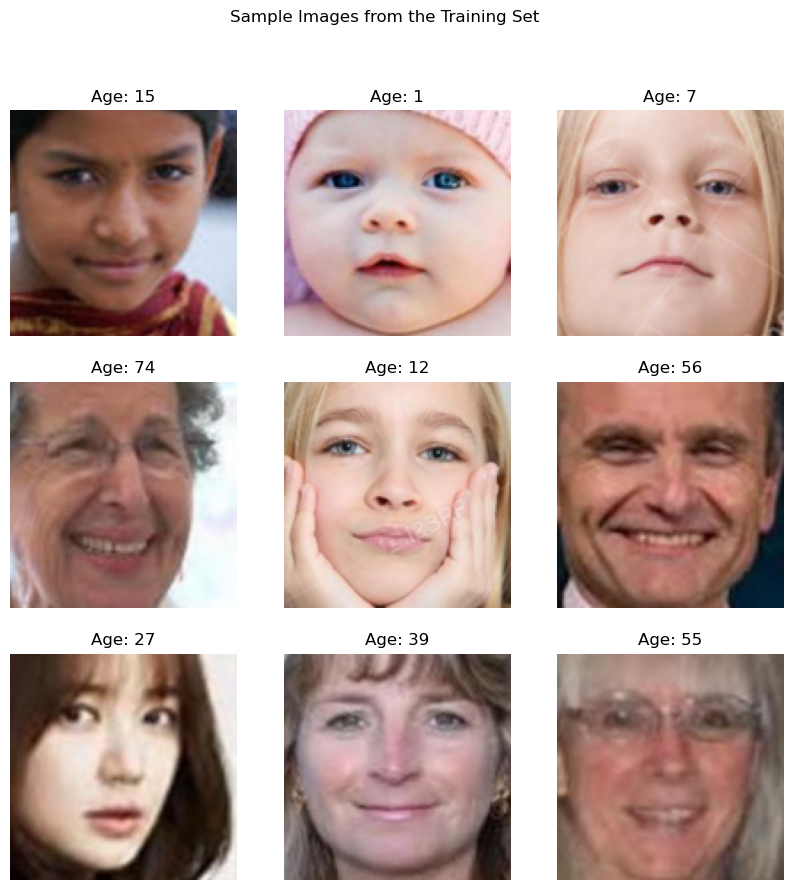

2025-10-24 01:42:06.987224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                        

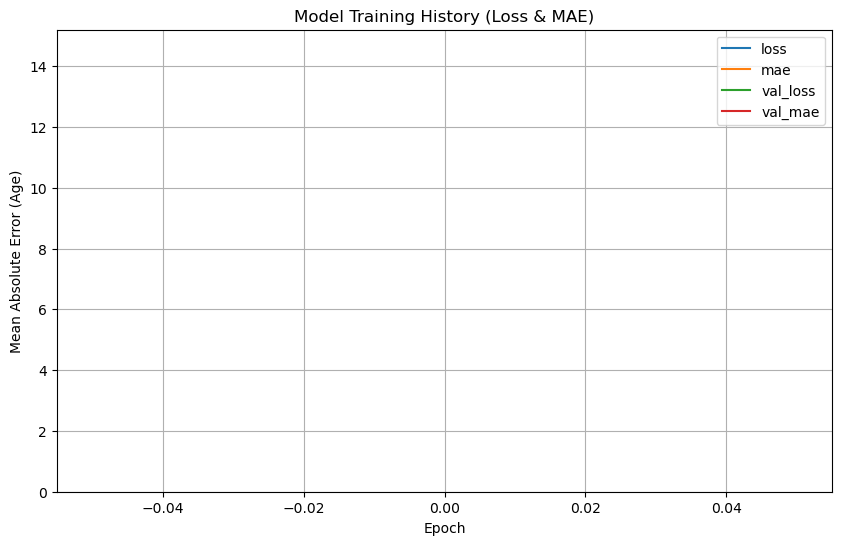

75/75 - 20s - loss: 14.2825 - mae: 14.2825 - 20s/epoch - 271ms/step

Test set Mean Absolute Error (MAE): 14.28 years
This means the model's predictions are, on average, off by about 14.28 years.

--- Making Predictions on Test Images ---
1/1 [==============================] - 0s 312ms/step


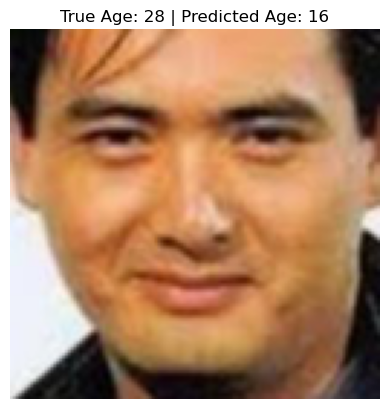

1/1 [==============================] - 0s 54ms/step


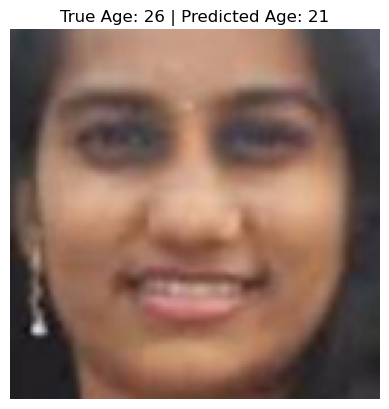

1/1 [==============================] - 0s 57ms/step


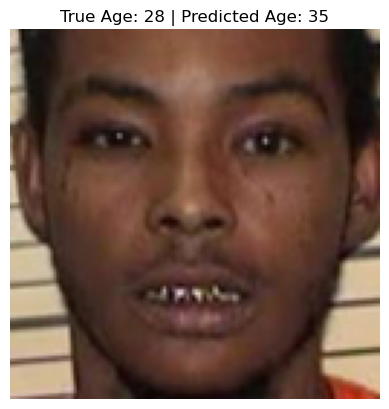

1/1 [==============================] - 0s 53ms/step


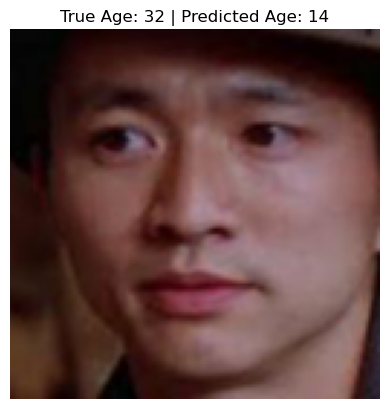

1/1 [==============================] - 0s 60ms/step


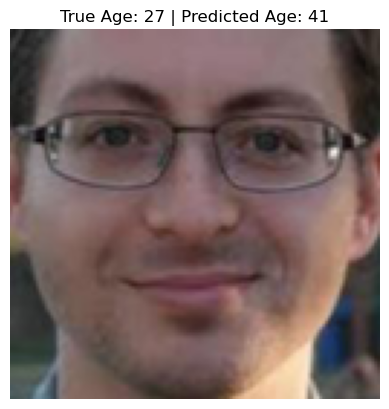

In [ ]:
# -------------------------------------------------------------------
# Jupyter Notebook: Age Prediction from Facial Images
# -------------------------------------------------------------------

# --- 1. SETUP AND IMPORTS ---
# Install necessary libraries if you haven't already
# !pip install tensorflow numpy matplotlib scikit-learn pillow

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

print("TensorFlow Version:", tf.__version__)

# --- 2. DATA LOADING AND PREPROCESSING ---

# NOTE: Download the UTKFace dataset first.
# Download and extract it to a known location.
# The dataset contains over 20,000 face images with age, gender, and ethnicity annotations in the filename.
# Filename format: [age]_[gender]_[race]_[date&time].jpg
# - age: integer from 1 to 116
# - gender: 0 for male, 1 for female

# --- Configuration ---
DATASET_PATH = '/Users/sanjeev/Downloads/archive/UTKFace' # IMPORTANT: CHANGE THIS TO YOUR DATASET PATH
IMAGE_SIZE = (128, 128) # Resize images to a consistent size
BATCH_SIZE = 32
EPOCHS = 30

# --- Data Loading Function ---
def load_and_preprocess_data(dataset_path, img_size):
    """
    Loads images and extracts age labels from the UTKFace dataset.

    Args:
        dataset_path (str): The path to the UTKFace dataset folder.
        img_size (tuple): The target size for the images (height, width).

    Returns:
        tuple: A tuple containing two numpy arrays (images, ages).
    """
    images = []
    ages = []
    
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset path not found at '{dataset_path}'")
        print("Please download the UTKFace dataset and update the DATASET_PATH variable.")
        return None, None

    image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]
    
    print(f"Found {len(image_files)} images. Loading and preprocessing...")

    for filename in tqdm(image_files):
        try:
            # Extract age from filename
            age = int(filename.split('_')[0])
            
            # Load image
            img_path = os.path.join(dataset_path, filename)
            img = Image.open(img_path).convert('RGB') # Ensure 3 channels
            
            # Resize image
            img = img.resize(img_size)
            
            # Convert to numpy array and normalize
            img_array = np.array(img) / 255.0
            
            images.append(img_array)
            ages.append(age)
            
        except (ValueError, IndexError) as e:
            # Handle filenames that don't match the expected format
            print(f"Skipping file with invalid name format: {filename} ({e})")
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

    return np.array(images), np.array(ages)

# --- Load the data ---
images, ages = load_and_preprocess_data(DATASET_PATH, IMAGE_SIZE)

if images is not None and ages is not None:
    print(f"\nSuccessfully loaded {len(images)} images and {len(ages)} labels.")
    print("Image array shape:", images.shape)
    print("Ages array shape:", ages.shape)

    # --- Split data into training, validation, and test sets ---
    X_train, X_temp, y_train, y_temp = train_test_split(images, ages, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"\nTraining set: {len(X_train)} samples")
    print(f"Validation set: {len(X_val)} samples")
    print(f"Test set: {len(X_test)} samples")

# --- 3. EXPLORATORY DATA ANALYSIS (EDA) ---
if images is not None:
    # --- Plot age distribution ---
    plt.figure(figsize=(12, 6))
    plt.hist(ages, bins=range(0, 120, 5), edgecolor='black')
    plt.title('Age Distribution in UTKFace Dataset')
    plt.xlabel('Age')
    plt.ylabel('Number of Images')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # --- Display sample images ---
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        random_index = np.random.randint(0, len(X_train))
        plt.imshow(X_train[random_index])
        plt.title(f"Age: {y_train[random_index]}")
        plt.axis("off")
    plt.suptitle("Sample Images from the Training Set")
    plt.show()

# --- 4. MODEL BUILDING ---
def build_age_prediction_model(input_shape):
    """
    Builds a CNN model for age regression.

    Args:
        input_shape (tuple): The shape of the input images (height, width, channels).

    Returns:
        tf.keras.Model: The compiled Keras model.
    """
    model = Sequential([
        # Input Layer
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        
        # Hidden Layers
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Flatten and Dense Layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5), # Dropout for regularization
        Dense(256, activation='relu'),
        Dropout(0.5),
        
        # Output Layer
        # Single neuron with linear activation for regression
        Dense(1, activation='linear', name='age_output') 
    ])
    
    # Compile the model
    # Mean Absolute Error is a good loss function for age prediction
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mae',
                  metrics=['mae']) # Mean Absolute Error
                  
    return model

if images is not None:
    # Build the model
    model = build_age_prediction_model(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    model.summary()

# --- 5. MODEL TRAINING ---
if images is not None:
    print("\nStarting model training...")
    
    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping]
    )
    
    print("Model training finished.")

# --- 6. MODEL EVALUATION ---
if images is not None:
    # --- Plot training history ---
    pd.DataFrame(history.history).plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0, max(history.history['loss'] + history.history['val_loss']))
    plt.title('Model Training History (Loss & MAE)')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (Age)')
    plt.show()

    # --- Evaluate on the test set ---
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
    print(f"\nTest set Mean Absolute Error (MAE): {test_mae:.2f} years")
    print(f"This means the model's predictions are, on average, off by about {test_mae:.2f} years.")

# --- 7. PREDICTION ON NEW IMAGES ---
if images is not None:
    def predict_age_from_image(image_path, model, img_size):
        """
        Loads an image, preprocesses it, and predicts the age.
        """
        try:
            img = Image.open(image_path).convert('RGB')
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized) / 255.0
            img_batch = np_expand_dims(img_array, axis=0) # Create a batch of 1

            # Predict
            predicted_age = model.predict(img_batch)[0][0]

            # Display
            plt.imshow(img)
            plt.title(f"Predicted Age: {int(predicted_age)}")
            plt.axis('off')
            plt.show()
            
        except FileNotFoundError:
            print(f"Error: Image not found at {image_path}")
        except Exception as e:
            print(f"An error occurred: {e}")

    # --- Make predictions on a few test images ---
    print("\n--- Making Predictions on Test Images ---")
    for i in range(5):
        random_index = np.random.randint(0, len(X_test))
        
        # We need to show the original-like image, not the preprocessed one
        original_image_array = (X_test[random_index] * 255).astype(np.uint8)
        true_age = y_test[random_index]
        
        # The model expects a batch, so we add a dimension
        image_batch = np.expand_dims(X_test[random_index], axis=0)
        
        # Predict
        predicted_age = model.predict(image_batch)[0][0]
        
        # Display
        plt.imshow(original_image_array)
        plt.title(f"True Age: {true_age} | Predicted Age: {int(predicted_age)}")
        plt.axis('off')
        plt.show()



In [2]:
# --- SAVE THE TRAINED MODEL ---
# We save the model after training is complete, so we can reuse it later without retraining.
print("\nSaving the trained model...")
MODEL_SAVE_PATH = "age_prediction_model.h5"
model.save(MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")



Saving the trained model...
Model saved to age_prediction_model.h5


TensorFlow Version: 2.10.0
Loading model from: age_prediction_model.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                   

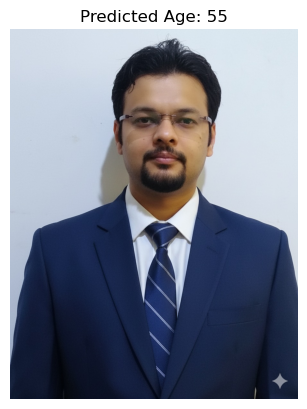

Successfully predicted age for: /Users/sanjeev/Desktop/RESUMES/Self.JPG
Predicted Age (raw): 54.68


In [10]:
# ===================================================================
# Python Script: Predict Age from a Saved Model
# ===================================================================
# This script demonstrates how to load a pre-trained Keras model 
# and use it to predict the age from a single image.

# --- 1. IMPORTS ---
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

print("TensorFlow Version:", tf.__version__)

# --- 2. CONFIGURATION ---
MODEL_PATH = "age_prediction_model.h5"  # Path to your saved model
IMAGE_SIZE = (128, 128)                 # Must be the same size as used during training

# --- 3. LOAD THE TRAINED MODEL ---
print(f"Loading model from: {MODEL_PATH}")

# Check if the model file exists
if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file not found at '{MODEL_PATH}'")
    print("Please ensure you have trained and saved the model first.")
else:
    # Load the model. It includes the architecture, weights, and optimizer state.
    model = tf.keras.models.load_model(MODEL_PATH)
    
    # Optional: Display the model's architecture
    model.summary()

# --- 4. PREDICTION FUNCTION ---
def predict_age_from_image(image_path, model, img_size):
    """
    Loads an image, preprocesses it, predicts the age, and displays the result.
    
    Args:
        image_path (str): Path to the input image.
        model (tf.keras.Model): The loaded Keras model.
        img_size (tuple): The target size for the image (height, width).
    """
    try:
        # --- Image Preprocessing ---
        # Load the image
        img = Image.open(image_path).convert('RGB')
        
        # Resize to the model's expected input size
        img_resized = img.resize(img_size)
        
        # Convert to numpy array and normalize pixel values to [0, 1]
        img_array = np.array(img_resized) / 255.0
        
        # Add a batch dimension, as the model expects a batch of images
        # Shape changes from (128, 128, 3) to (1, 128, 128, 3)
        img_batch = np.expand_dims(img_array, axis=0)

        # --- Make Prediction ---
        predicted_age = model.predict(img_batch)[0][0]

        # --- Display the Result ---
        plt.imshow(img)
        plt.title(f"Predicted Age: {int(round(predicted_age))}")
        plt.axis('off')
        plt.show()
        
        print(f"Successfully predicted age for: {image_path}")
        print(f"Predicted Age (raw): {predicted_age:.2f}")

    except FileNotFoundError:
        print(f"Error: Image not found at '{image_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- 5. EXECUTE PREDICTION ---
# IMPORTANT: Change this path to the image you want to test.
custom_image_path = '/Users/sanjeev/Desktop/RESUMES/Self.JPG'

if 'model' in locals():
    if custom_image_path == '/path/to/your/image.jpg' or not os.path.exists(custom_image_path):
        print("\n---")
        print("Please update the 'custom_image_path' variable to a valid image file path.")
        print("---")
    else:
        predict_age_from_image(custom_image_path, model, IMAGE_SIZE)



In [ ]:
# --- 8. PREDICT ON A SINGLE CUSTOM IMAGE ---
# This section allows you to test the model with your own image.

if 'model' in locals() and model is not None:
    print("\n--- Predicting Age from a Custom Image ---")
    
    # IMPORTANT: Change this path to the location of your image file.
    # For example: '/Users/yourname/Desktop/my_photo.jpg'
    custom_image_path = '/path/to/your/image.jpg'

    # Check if the placeholder path has been changed
    if custom_image_path == '/path/to/your/image.jpg':
        print("Please update the 'custom_image_path' variable with the path to your own image.")
    else:
        # We can reuse the prediction function defined in section 7
        # It handles loading, preprocessing, predicting, and displaying the result.
        predict_age_from_image(custom_image_path, model, IMAGE_SIZE)
else:
    print("\nModel not trained. Please run the entire notebook to train the model before making predictions.")




--- Predicting Age from a Custom Image ---
Please update the 'custom_image_path' variable with the path to your own image.


# --- 9. PROJECT SUMMARY FOR PRESENTATION ---

# -------------------------------------------------------------------
# Step-by-Step Summary of the Age Prediction Project
# -------------------------------------------------------------------

# *   **1. Project Objective**: The primary goal was to build a deep learning model capable of predicting the rough age of a person from a facial image. This is a computer vision regression task.

# *   **2. Dataset Selection**: We used the **UTKFace dataset**, which is ideal for this task as it contains over 20,000 diverse facial images. Crucially, the age, gender, and race are encoded directly in the filenames (e.g., `[age]_[gender]_[race]_[timestamp].jpg`).

# *   **3. Environment Setup**: The project began by importing essential Python libraries, including **TensorFlow** and **Keras** for building the neural network, **Pillow (PIL)** for image manipulation, **NumPy** for numerical operations, and **Matplotlib** for data visualization.

# *   **4. Initial Configuration**: We defined key hyperparameters, setting a consistent `IMAGE_SIZE` of (128, 128) pixels to standardize all input images and a `BATCH_SIZE` of 32 for training.

# *   **5. Data Loading and Label Extraction**: A custom function was written to iterate through the dataset folder. For each image, it parsed the filename to extract the **age** as the label.

# *   **6. Image Preprocessing**: During loading, each image was converted to RGB format, resized to our standard 128x128 dimensions, and normalized by dividing pixel values by 255.0. This scales the data to a [0, 1] range, which helps stabilize and accelerate model training.

# *   **7. Data Structuring**: The processed images and their corresponding age labels were stored in two NumPy arrays, which are the standard data structures for training models in Keras.

# *   **8. Exploratory Data Analysis (EDA)**: To understand our dataset, we plotted a histogram of the age distribution. This revealed an abundance of images for younger age groups and fewer images for very old individuals.

# *   **9. Visual Inspection**: We also displayed a random grid of images from the training set along with their true ages. This served as a sanity check to ensure our labels were correctly matched with the images.

# *   **10. Data Splitting**: The dataset was divided into three distinct sets to ensure robust evaluation: an **80% training set** (for the model to learn from), a **10% validation set** (for tuning during training), and a **10% test set** (for final, unbiased performance evaluation).

# *   **11. Model Architecture - CNN**: We designed and built a **Convolutional Neural Network (CNN)** from scratch. CNNs are the industry standard for image-based tasks as they can effectively learn spatial hierarchies of features.

# *   **12. Convolutional Layers**: The model consisted of a stack of `Conv2D` layers with increasing filter sizes (32, 64, 128, 256). These layers are responsible for detecting features like edges, textures, and eventually more complex patterns like eyes and noses.

# *   **13. Pooling and Regularization**: Each convolutional block was followed by `MaxPooling2D` to reduce dimensionality and `BatchNormalization` to stabilize training. `Dropout` layers were added in the dense part of the network to prevent overfitting.

# *   **14. Regression Output Layer**: The final layer was a `Dense` layer with a **single neuron** and a **'linear' activation function**. This is critical for a regression task, as it allows the model to output any continuous value representing the predicted age.

# *   **15. Model Compilation**: The model was compiled using the **Adam optimizer**. For the loss function, we chose **Mean Absolute Error (MAE)**, which is an intuitive metric that measures the average absolute difference between the predicted age and the true age in years.

# *   **16. Model Training**: The model was trained using the `.fit()` method on the training data. We also passed the validation data to monitor performance on unseen data at the end of each epoch.

# *   **17. Early Stopping**: To optimize training and prevent overfitting, an `EarlyStopping` callback was used. It monitored the validation loss and stopped the training process if the performance on the validation set did not improve for 5 consecutive epochs, automatically restoring the best model weights.

# *   **18. Performance Evaluation**: After training, we plotted the training and validation loss (MAE) curves to visualize the model's learning progress. The model was then formally evaluated on the unseen test set, giving us a final, unbiased MAE score.

# *   **19. Interpreting the Result**: The final MAE on the test set tells us, on average, how many years off our model's age predictions are. For example, an MAE of 5.0 means the predictions are off by an average of 5 years.

# *   **20. Real-World Prediction**: Finally, we created a simple, reusable function to load a single, external image from a file path. This function preprocesses the image, feeds it to the trained model, and displays the image with its predicted age, demonstrating the model's practical application.

